# First Attempt
batch size 256 lr 1e-3

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using Theano backend.
/home/giles/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Options

In [2]:
classTrainFeatures = basic_features
classModel = 'modelSwish'
varSet = "basic_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'PRI_tau_pt', 'DER_deltar_tau_lep', 'PRI_jet_leading_eta', 'PRI_lep_eta', 'PRI_tau_eta', 'DER_lep_eta_centrality', 'DER_mass_jet_jet', 'DER_deltaeta_jet_jet', 'DER_pt_tot', 'DER_met_phi_centrality', 'PRI_jet_num', 'PRI_met', 'DER_pt_h', 'DER_pt_ratio_lep_tau', 'DER_sum_pt', 'PRI_jet_leading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_all_pt', 'PRI_met_sumet', 'DER_prodeta_jet_jet', 'PRI_lep_pt', 'PRI_jet_subleading_pt', 'PRI_met_phi', 'PRI_jet_leading_phi', 'PRI_lep_phi', 'PRI_jet_subleading_phi', 'PRI_tau_phi']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 7.015s 


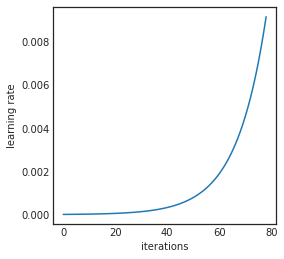

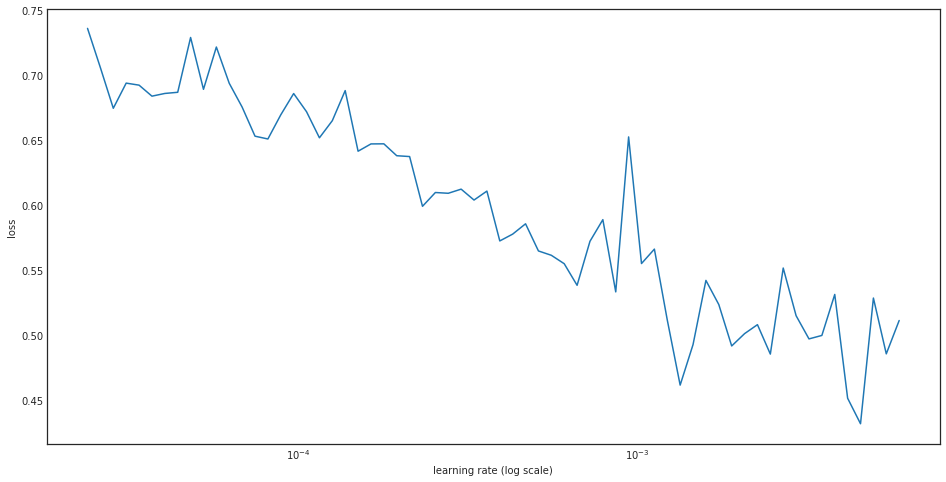

______________________________________



In [4]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-2], trainOnWeights=False, verbose=0)

In [4]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 0.471925528929
2 New best found: 0.425677936217
3 New best found: 0.411690509584
4 New best found: 0.401545282239
5 New best found: 0.392181627951
6 New best found: 0.384311495926
7 New best found: 0.383006299481
10 New best found: 0.377254368297
11 New best found: 0.375289124657
12 New best found: 0.374130834214
13 New best found: 0.371463891543
14 New best found: 0.37051306052
15 New best found: 0.37026721822
19 New best found: 0.369902384716
22 New best found: 0.368515007193
24 New best found: 0.366430376248
26 New best found: 0.365882420841
27 New best found: 0.364347891899
29 New best found: 0.363860767598
30 New best found: 0.363754409781
31 New best found: 0.363692597817
49 New best found: 0.36301205576
51 New best found: 0.362669572276
52 New best found: 0.362296018684
55 New best found: 0.361462808936
56 New best found: 0.361282162673
57 New best found: 0.361259387188
58 New b

60 New best found: 0.354955215764
61 New best found: 0.35490761385
62 New best found: 0.354847106695
63 New best found: 0.354846636271
89 New best found: 0.35466790452
98 New best found: 0.354365019155
106 New best found: 0.354135448194
107 New best found: 0.353541663408
114 New best found: 0.353398041654
115 New best found: 0.353362761593
116 New best found: 0.353212570381
118 New best found: 0.353203849649
123 New best found: 0.35320054462
124 New best found: 0.353182076764
125 New best found: 0.353158773589
Early stopping after 325 epochs
Score is: {'loss': 0.35315877358913422, 'AUC': 0.088326667900493372, 'wAUC': 0.065581041528142481}
Fold took 242.966s

Running fold 7 / 10
1 New best found: 0.465201498199
2 New best found: 0.41200300374
3 New best found: 0.403709788895
4 New best found: 0.396359169412
6 New best found: 0.385194554663
7 New best found: 0.383658808303
10 New best found: 0.380684098053
11 New best found: 0.37895679915
12 New best found: 0.376018180466
13 New best fou

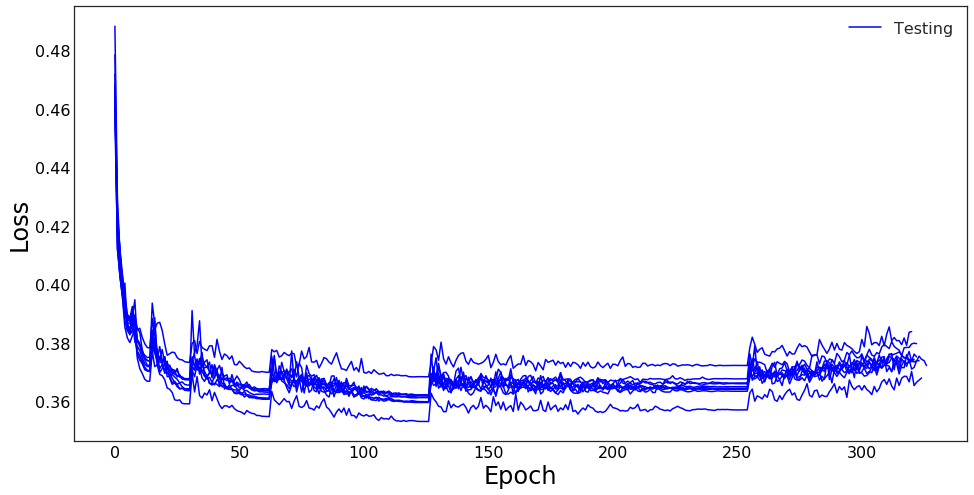

Mean wAUC = 0.07 +- 0.0007
______________________________________



In [5]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=200, cosAnnealMult=2, trainOnWeights=False, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [6]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [7]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 5 with loss = 0.353158773589
Model 1 is 0 with loss = 0.359650762741
Model 2 is 4 with loss = 0.359838031125
Model 3 is 3 with loss = 0.359927888989
Model 4 is 1 with loss = 0.36125335098
Model 5 is 6 with loss = 0.361480156052
Model 6 is 7 with loss = 0.361861958473
Model 7 is 2 with loss = 0.362204667622
Model 8 is 8 with loss = 0.362219352504
Model 9 is 9 with loss = 0.368388614182


## Response on development data

In [8]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000194990898954s per sample

Predicting batch 2 out of 10
Prediction took 0.000167228395859s per sample

Predicting batch 3 out of 10
Prediction took 0.000155039104448s per sample

Predicting batch 4 out of 10
Prediction took 0.000159222149849s per sample

Predicting batch 5 out of 10
Prediction took 0.000161806750298s per sample

Predicting batch 6 out of 10
Prediction took 0.000152642858028s per sample

Predicting batch 7 out of 10
Prediction took 0.000160015296936s per sample

Predicting batch 8 out of 10
Prediction took 0.000165609987004s per sample

Predicting batch 9 out of 10
Prediction took 0.000153963098145s per sample

Predicting batch 10 out of 10
Prediction took 0.000154008197274s per sample



In [9]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.913884242487, weighted 0.934143272617


## Response on val data

In [10]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000156135988235s per sample

Predicting batch 2 out of 10
Prediction took 0.000187753200531s per sample

Predicting batch 3 out of 10
Prediction took 0.000153439807892s per sample

Predicting batch 4 out of 10
Prediction took 0.00015698800087s per sample

Predicting batch 5 out of 10
Prediction took 0.00016329498291s per sample

Predicting batch 6 out of 10
Prediction took 0.000148109006882s per sample

Predicting batch 7 out of 10
Prediction took 0.000147087812424s per sample

Predicting batch 8 out of 10
Prediction took 0.000152630615234s per sample

Predicting batch 9 out of 10
Prediction took 0.000152057790756s per sample

Predicting batch 10 out of 10
Prediction took 0.000148498773575s per sample



In [11]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.908679044098, weighted 0.929633451381


## Evaluation

### Import in dataframe

In [12]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [13]:
devData = convertToDF(trainData)
valData = convertToDF(valData)

200000 candidates loaded
50000 candidates loaded


In [14]:
sigVal = (valData.gen_target == 1)
bkgVal = (valData.gen_target == 0)

### MVA distributions

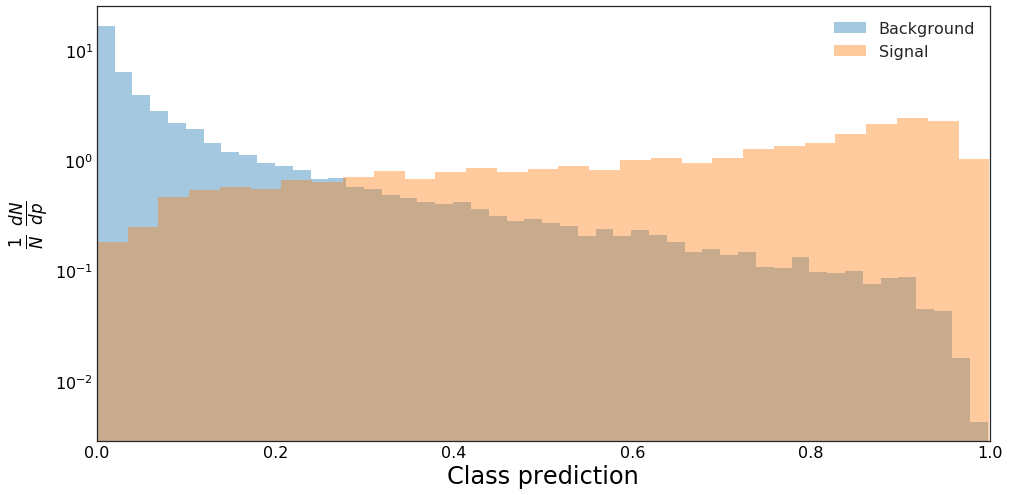

In [15]:
getClassPredPlot([valData[bkgVal], valData[sigVal]], weightName='gen_weight')

In [16]:
def AMS(s, b):
    """ Approximate Median Significance defined as:
        AMS = sqrt(
                2 { (s + b + b_r) log[1 + (s/(b+b_r))] - s}
              )        
    where b_r = 10, b = background, s = signal, log is natural logarithm """
    
    br = 10.0
    radicand = 2 *( (s+b+br) * math.log (1.0 + s/(b+br)) -s)
    if radicand < 0:
        print 'radicand is negative. Exiting'
        exit()
    else:
        return math.sqrt(radicand)
    
def amsScan(inData, res=0.0001):
    best = [0,-1]
    for i in np.linspace(0.,1.,1./res):
        ams = AMS(np.sum(inData.loc[(inData['pred_class'] >= i) & sigVal, 'gen_weight']),
                  np.sum(inData.loc[(inData['pred_class'] >= i) & bkgVal, 'gen_weight']))
        if ams > best[1]:
            best = [i, ams]
    print best

In [17]:
amsScan(valData)

/home/giles/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


[0.84468446844684475, 1.6110299710141616]


In [18]:
def scoreTest(ensemble, weights, features, cut, name):
    testData = pandas.read_csv('../Data/test.csv')
    with open(dirLoc + 'inputPipe.pkl', 'r') as fin:
        inputPipe = pickle.load(fin)

    testData['pred_class'] = ensemblePredict(inputPipe.transform(testData[features].values.astype('float32')), ensemble, weights)    	

    testData['Class'] = 'b'
    testData.loc[testData.pred_class >= cut, 'Class'] = 's'

    testData.sort_values(by=['pred_class'], inplace=True)
    testData['RankOrder']=range(1, len(testData)+1)
    testData.sort_values(by=['EventId'], inplace=True)

    testData.to_csv(dirLoc + name + '_test.csv', columns=['EventId', 'RankOrder', 'Class'], index=False)

In [19]:
scoreTest(ensemble, weights, classTrainFeatures, 0.84468446844684475, 'Model_0_Basic_Features_256_1e-3_swish_mult2_200E')

## Save classified data

In [ ]:
name = dirLoc + signal + "_" + channel + "_" + varSet + '_' + classModel + '_classifiedData.csv'
print "Saving data to", name
valData.to_csv(name, columns=['gen_target', 'gen_weight', 'gen_sample', 'pred_class'])

## Save/load

In [ ]:
name = "weights/DNN_" + signal + "_" + channel + "_" + varSet + '_' + classModel
print name

### Save

In [ ]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

### Load

In [ ]:
ensemble, weights, compileArgs, inputPipe, outputPipe = loadEnsemble(name)